# Major Project

## Start with data cleaning

In [17]:
import pandas as pd
df=pd.read_excel('train.xlsx')
df.dropna(inplace=True)

In [18]:
df['Engine']=df['Engine'].str.replace('CC','')
df['Engine']=df['Engine'].str.strip()
df['Power']=df['Power'].str.replace('bhp','')
df['Power']=df['Power'].str.strip()
df['Mileage']=df['Mileage'].str.replace('kmpl','').str.replace('km/kg','')
df['Mileage']=df['Mileage'].str.strip()
data=df.copy()
new = data['Name'].str.split(' ',n = 2, expand = True) 
data['company']= new[0] 
data['model']= new[1]
data['rem']=new[2]
data.drop(['Name'],axis=1,inplace=True)
data['Location']=data['Location'].astype("category").cat.codes
tr={"Manual":1,"Automatic":2}
data['Transmission']=data['Transmission'].map(tr)
data['company']=data['company'].astype("category").cat.codes
ft={"CNG":1,"LPG":2,"Diesel":3,"Petrol":4}
data['Fuel_Type']=data['Fuel_Type'].map(ft)

In [19]:
data['model']=data['model'].astype("category").cat.codes
tr={"First":1,"Second":2,"Third":3,"Fourth & Above":4}
data['Owner_Type']=data['Owner_Type'].map(tr)

## Data Analysis

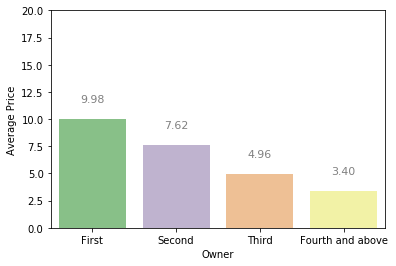

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
x=['First','Second','Third','Fourth and above']
y = [df.Price[(df['Owner_Type']=='First')].mean(),\
     df.Price[(df['Owner_Type']=='Second')].mean(),\
     df.Price[(df['Owner_Type']=='Third')].mean(),\
     df.Price[(df['Owner_Type']=='Fourth & Above')].mean()]

vis1= sns.barplot(x,y,palette='Accent')
vis1.set(xlabel='Owner',ylabel='Average Price')
vis1.set(ylim=(0,20))


for p in vis1.patches:
             vis1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')

plt.ioff()

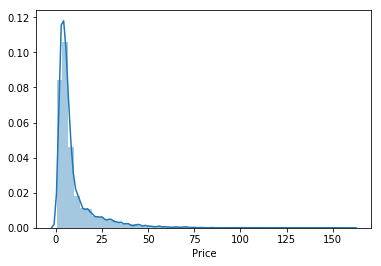

In [21]:
sns.distplot(df['Price'])

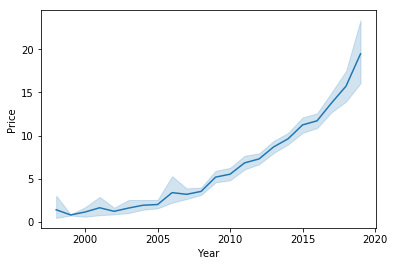

In [22]:
sns.lineplot(x="Year", y="Price",data=df)

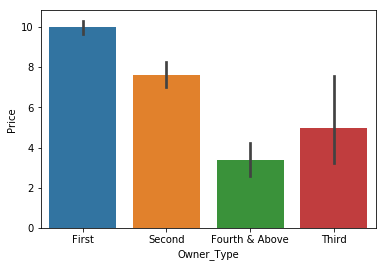

In [23]:
sns.barplot(x="Owner_Type", y="Price", data = df)

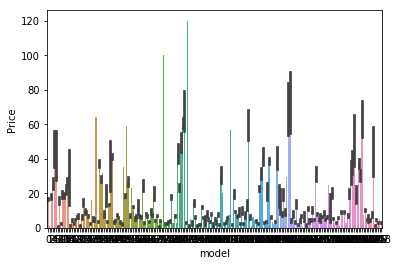

In [24]:
sns.barplot(x="model", y="Price", data = data)

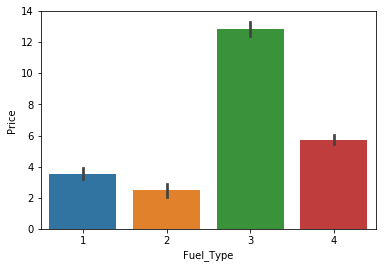

In [25]:
sns.barplot(x="Fuel_Type", y="Price", data = data)

## Training Machine

In [26]:
import sklearn
from sklearn import svm,preprocessing
data=sklearn.utils.shuffle(data)
X=data.drop(['Price','rem','Power'],axis=1).values
X=preprocessing.scale(X)
y=data['Price'].values

In [27]:
test_size=200
X_train=X[:-test_size]
y_train=y[:-test_size]

X_test=X[-test_size:]
y_test=y[-test_size:]

clf=svm.SVR(kernel="rbf")
clf.fit(X_train,y_train)
print("Done")

Done


In [28]:
clf.score(X_test,y_test)

0.772534411818151

- Accuracy of 77%

In [29]:
for X,y in zip(X_test,y_test):
    print(f"Model: {clf.predict([X])[0]}, Actual: {y}")

Model: 3.2676340676905244, Actual: 3.64
Model: 2.4354471004486165, Actual: 2.5
Model: 6.9309223806095135, Actual: 4.85
Model: 5.574862064247688, Actual: 7.99
Model: 7.093099194866308, Actual: 8.9
Model: 12.523739161402752, Actual: 7.11
Model: 6.755094538262162, Actual: 6.75
Model: 23.109858496323657, Actual: 29.0
Model: 8.107659311046442, Actual: 7.36
Model: 15.555693840401577, Actual: 23.0
Model: 5.856053087768039, Actual: 3.75
Model: 3.1465141100275567, Actual: 3.75
Model: 3.43593636620719, Actual: 3.35
Model: 6.6593589761289875, Actual: 2.2
Model: 2.8663685576700564, Actual: 3.85
Model: 2.9781539960099384, Actual: 2.75
Model: 1.784828928655851, Actual: 2.2
Model: 9.367463147869696, Actual: 8.45
Model: 2.753383572119861, Actual: 3.77
Model: 5.365695661012873, Actual: 7.45
Model: 27.32629990736003, Actual: 36.0
Model: 2.325569288506615, Actual: 1.87
Model: 18.910168973447373, Actual: 17.74
Model: 4.828674481701809, Actual: 4.3
Model: 7.290803531935445, Actual: 5.6
Model: 6.61744139779

## To fill the data in test excel sheet

In [47]:
df=pd.read_excel('test.xlsx')

In [48]:
df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

In [49]:
df['Engine']=df['Engine'].str.replace('CC','')
df['Engine']=df['Engine'].str.strip()
df['Power']=df['Power'].str.replace('bhp','')
df['Power']=df['Power'].str.strip()
df['Mileage']=df['Mileage'].str.replace('kmpl','').str.replace('km/kg','')
df['Mileage']=df['Mileage'].str.strip()
new = df['Name'].str.split(' ',n = 2, expand = True) 
df['company']= new[0] 
df['model']= new[1]
df['rem']=new[2]
df.drop(['Name'],axis=1,inplace=True)
df['Location']=df['Location'].astype("category").cat.codes
tr={"Manual":1,"Automatic":2}
df['Transmission']=df['Transmission'].map(tr)
df['company']=df['company'].astype("category").cat.codes
ft={"CNG":1,"LPG":2,"Diesel":3,"Petrol":4}
df['Fuel_Type']=df['Fuel_Type'].map(ft)
df['model']=df['model'].astype("category").cat.codes
tr={"First":1,"Second":2,"Third":3,"Fourth & Above":4}
df['Owner_Type']=df['Owner_Type'].map(tr)

In [50]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,company,model,rem
0,4,2014,40929,1,1,1,32.26,998,58.2,4.0,16,16,K10 LXI CNG
1,3,2013,54493,4,1,2,24.7,796,47.3,5.0,16,16,800 2016-2019 LXI
2,9,2017,34000,3,1,1,13.68,2393,147.8,7.0,26,78,Crysta Touring Sport 2.4 MT
3,5,2012,139000,3,1,1,23.59,1364,null,5.0,26,60,Liva GD
4,9,2014,29000,4,1,1,18.5,1197,82.85,5.0,9,159,Magna


In [55]:
df.fillna(method='bfill', inplace=True)
print("Done")

Done


In [56]:
df.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
company              0
model                0
rem                  0
dtype: int64

In [60]:
df.dtypes

Location                int8
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int64
Transmission           int64
Owner_Type             int64
Mileage              float64
Engine                 int64
Power                 object
Seats                float64
company                 int8
model                  int16
rem                   object
dtype: object

In [59]:
df['Mileage']=pd.to_numeric(df['Mileage'])
df['Engine']=pd.to_numeric(df['Engine'])


In [63]:
A=df.drop(['rem','Power'],axis=1).values
A=preprocessing.scale(A)

In [65]:
for X in A:
    print(f"Model: {clf.predict([X])[0]}")

Model: 3.502007594322925
Model: 2.524441850607655
Model: 15.562533857040012
Model: 3.2833188055998592
Model: 4.135168059843436
Model: 10.041711402569685
Model: 19.47595980017926
Model: 2.06179441459084
Model: 2.89774312001789
Model: 11.54958334247391
Model: 14.193594384273297
Model: 5.935941667052318
Model: 2.7934608928084312
Model: 2.262940200984602
Model: 5.998023569632245
Model: 24.16522848018927
Model: 26.85747070385004
Model: 2.4972880758324187
Model: 8.657878782596448
Model: 5.813133077079965
Model: 5.2266771684272815
Model: 2.4080099401958304
Model: 3.23980188419043
Model: 3.7295828630074555
Model: 6.4954430969962695
Model: 0.8419854630465764
Model: 1.5363877543129902
Model: 5.61829695311403
Model: 9.10372884125314
Model: 3.31934380812893
Model: 4.448968100677654
Model: 5.485819918479827
Model: 2.281906789865409
Model: 13.092880957863667
Model: 4.345893672634089
Model: 5.247366209182448
Model: 13.85837718372717
Model: 11.866319561899871
Model: 7.542798723273038
Model: 14.5024016

Model: 11.10967360792837
Model: 1.9147575553731997
Model: 7.671167098435172
Model: 2.859764366232924
Model: 2.268324590731236
Model: 4.5472857187428435
Model: 5.967244628990034
Model: 3.4782807370257993
Model: 7.189497366148752
Model: 2.057497011150084
Model: 2.6498075544476993
Model: 24.81503912920597
Model: 2.7312973921138113
Model: 4.8136008459794954
Model: 9.166239282364371
Model: 3.009021918740155
Model: 14.26759616270397
Model: 3.7876895252156144
Model: 17.84434511317317
Model: 2.8328875774102995
Model: 5.098556848419435
Model: 3.8220775168463232
Model: 3.8925600405513796
Model: 3.0406279489954766
Model: 1.8257032108938933
Model: 3.59980798111358
Model: 5.488536392994255
Model: 8.401275354921736
Model: 2.8342306567827036
Model: 2.585372966751109
Model: 3.0064001175972974
Model: 2.0299174191932705
Model: 7.361055596278918
Model: 11.472526150684716
Model: 4.5656653872206
Model: 4.920835033476594
Model: 4.620855368842928
Model: 2.5410826179681187
Model: 12.171604290903296
Model: 10.

Model: 6.224601036427737
Model: 22.797690054960896
Model: 5.188467996038064
Model: 30.691229006793208
Model: 2.8517989106169823
Model: 32.27905520149599
Model: 8.677376711477883
Model: 2.2121869111071177
Model: 12.62124124607831
Model: 28.894569096614966
Model: 5.791059730699757
Model: 4.443645393695365
Model: 7.584948246359244
Model: 7.710346183891518
Model: 1.8561920186665724
Model: 1.9840443652685744
Model: 3.68649101753045
Model: 14.078558681514536
Model: 4.676968132681495
Model: 1.087503307991451
Model: 7.608938388233103
Model: 4.0901951799723495
Model: 2.4851017338476886
Model: 21.448526907257133
Model: 5.584859165884465
Model: 4.748928172016187
Model: 1.466036125508011
Model: 2.8538168963473796
Model: 2.3353378743533817
Model: 1.7020480617898812
Model: 3.063730223327166
Model: 13.698523028801766
Model: 7.1722418977973055
Model: 5.023724444993891
Model: 6.953609040080361
Model: 4.405017714524858
Model: 6.021196135288091
Model: 16.182401331518825
Model: 32.29027201024111
Model: 13

In [70]:
import openpyxl
xfile = openpyxl.load_workbook('test.xlsx')

sheet = xfile.get_sheet_by_name('Sheet1')
sheet['L1'] = 'Price'
i=2
for X in A:
    c=sheet.cell(i,12)
    c.value=clf.predict([X])[0]
    i=i+1
xfile.save('filled_values.xlsx')
print("File saved")

File saved
